# Assignment 2: Part B (70 marks)

Assignment 2 uses data collected by the U.S. Census Bureau’s **American Community Survey** (ACS).  ACS datasets and documentation for this assignment are provided in the `data` folder.

> *Have you ever thought about how, or why, new roads, schools, after-school programs, or hospitals are placed in communities?  Why there is an ATM or bike-share kiosk on a specific street corner? <br>
The answers often lie in the numbers — numbers that reflect what our communities look like, how our communities have changed, and how those changes impact our daily lives.
<br/><br/>The U.S. Census Bureau’s American Community Survey (ACS) is designed to answer these types of questions and to meet the needs of policymakers, business leaders, planners, and others nationwide who need good
data to make informed decisions*. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors

import numpy as np
import pandas as pd

import seaborn as sns
sns.set()

### B1.1 Load health insurance data (5 marks)
The Health Insurance Coverage for all five boroughs was extracted from the ACS economic dataset and loaded into the excel spreadsheet:  `health-insurance.xlsx` 

For the `b11_load()` function below: 
- Load the Health Insurance Coverage excel spreadsheet `health-insurance.xlsx` into a DataFrame.
  - Your DataFrame's row and column indexes should match those in the excel spreadsheet.
  - You will need to convert data values from strings into integers.
- The code cell provided below function b1_load() - shown below - should return the value `8557254`.
  - Which is the `Civilian noninstitutionalized population` of New York City.

`b11 = b11_load()
 b11['New York City','Estimate'][0]`
 
 

In [2]:
def b11_load():
    """
    b11_load function is created to load the data file
    file name is an excel file : health-insurance.xlsx
    
    """
    # Load the health-insurance excel file into DataFrame b11, the header=[0, 1] for multi-level columns
    b11 = pd.read_excel('health-insurance.xlsx', index_col=0, header=[0, 1]) 
    
    def str_to_int(value):
        """
        str_to_int function used to convert values with string to integer
        """
        # If the value is a string, try to convert it to an integer
        if isinstance(value, str):
            try:
                return int(value.replace(',', '')) # Remove commas and try to convert to integer
            except ValueError:
                return value #If conversion fails, return the original string value
        else:
             #If the value is not a string, return it unchanged
            return value

    # Apply coverting function to the entire DataFrame
    b11 = b11.applymap(str_to_int)
    
    return b11

    pass

In [3]:
b11 = b11_load() # load the b11 DataFrame
b11['New York City','Estimate'][0] # Extract the value for the Civilian noninstitutionalized population of New York City

8557254

In [ ]:
#help(pd.read_excel)

In [5]:
b11.head()

Borough                                      New York City                  \
Type                                              Estimate Margin of Error   
    Civilian noninstitutionalized population       8557254        +/-4,124   
      With health insurance coverage               7942126       +/-21,527   
        With private health insurance              4995085       +/-43,494   
        With public coverage                       3736190       +/-39,689   
      No health insurance coverage                  615128       +/-20,607   

Borough                                                                        \
Type                                          Percent Percent Margin of Error   
    Civilian noninstitutionalized population  8557254                     (X)   
      With health insurance coverage            92.8%                  +/-0.2   
        With private health insurance           58.4%                  +/-0.5   
        With public coverage                    43.7%                  +/-0.5   
      No health insurance coverage               7.2%                  +/-0.2   

Borough                                         Bronx                  \
Type                                         Estimate Margin of Error   
    Civilian noninstitutionalized population  1449818        +/-2,803   
      With health insurance coverage          1330519        +/-9,422   
        With private health insurance          670068       +/-19,104   
        With public coverage                   830048       +/-19,570   
      No health insurance coverage             119299        +/-8,803   

Borough                                                                        \
Type                                          Percent Percent Margin of Error   
    Civilian noninstitutionalized population  1449818                     (X)   
      With health insurance coverage            91.8%                  +/-0.6   
        With private health insurance           46.2%                  +/-1.3   
        With public coverage                    57.3%                  +/-1.3   
      No health insurance coverage               8.2%                  +/-0.6   

Borough                                      Brooklyn                  ...  \
Type                                         Estimate Margin of Error  ...   
    Civilian noninstitutionalized population  2634931        +/-2,107  ...   
      With health insurance coverage          2452085       +/-10,843  ...   
        With private health insurance         1469510       +/-20,311  ...   
        With public coverage                  1200734       +/-19,984  ...   
      No health insurance coverage             182846       +/-10,495  ...   

Borough                                      Manhattan  \
Type                                           Percent   
    Civilian noninstitutionalized population   1653585   
      With health insurance coverage             95.0%   
        With private health insurance            68.4%   
        With public coverage                     35.0%   
      No health insurance coverage                5.0%   

Borough                                                                Queens  \
Type                                         Percent Margin of Error Estimate   
    Civilian noninstitutionalized population                     (X)  2343840   
      With health insurance coverage                          +/-0.5  2131973   
        With private health insurance                         +/-1.1  1383845   
        With public coverage                                  +/-1.1   963522   
      No health insurance coverage                            +/-0.5   211867   

Borough                                                                \
Type                                         Margin of Error  Percent   
    Civilian noninstitutionalized population        +/-1,851  2343840   
      With health insurance coverage               +/-12,566    

### B1.2 Loading resident age categories (5 marks)
The breakdown of resident age into categories (Under 5 years, 5 to 9 years, etc.) for the residents of the five boroughs was extracted from the ACS demographic dataset and loaded into the excel spreadsheet:  `demographics.xlsx` 

For the `b12_load()` function below: 
- Load the resident's age data from the excel spreadsheet `demographics.xlsx` into a DataFrame.
- Your DataFrame's row and column indexes should match those in the excel spreadsheet.
- The code cell provided below function b12_load() - shown below - should return the value `40.4`.
  - Which is the the Median age in (years) for Staten Island residents.

`b12 = b12_load()
 b12['Staten Island','Estimate'][-1]`

In [8]:
def b12_load():
    """
    b11_load function is created to load the data file
    file name is an excel file : demographics.xlsx
    """
    # Load the health-insurance excel file into DataFrame b11, the header=[0, 1] for multi-level columns
    b12 = pd.read_excel('demographics.xlsx', index_col=0, header=[0, 1]) 
    
    def str_to_float(value):
        """
        str_to_float function used to convert values with string to float
        """
        # If the value is a string, try to convert it to an integer
        if isinstance(value, str):
            try:
                return float(value.replace(',', '').replace( '%','')) # Remove commas and try to convert to integer
            except ValueError:
                return value #If conversion fails, return the original string value
        else:
             #If the value is not a string, return it unchanged
            return value

    # Apply coverting function to the entire DataFrame
    b12 = b12.applymap(str_to_float)
    
    return b12

    pass

In [9]:
b12 = b12_load() #Call function b12_load() to read the data
b12['Staten Island','Estimate'][-1] # the Median age in (years) for Staten Island residents.

40.4

In [24]:
#b12.tail()

In [25]:
#b12.index.size

### B1.3 Age demographics of NYC Boroughs  (16 marks)
How do the relative age distributions compare across the five boroughs?  Are some areas more 'youthful' then others?  Are some perhaps more 'middle-aged'? The ACS demographic dataset, demo_2017acs1yr_nyc.xlsx, provides a breakdown of resident ages into 13 categories:
<table>
   <tr><td>0 to 19 years</td><td>20 to 54 years</td><td>55 and over</td></tr>
   <tr><td style="vertical-align:top">Under 5 years<br>5 to 9 years<br>10 to 14 years<br>15 to 19 years</td>
       <td style="vertical-align:top">20 to 24 years<br>25 to 34 years<br>35 to 44 years<br>45 to 54 years</td>
       <td>55 to 59 years<br>60 to 64 years<br>65 to 74 years<br>75 to 84 years<br>85 years and over</td>
   </tr>
</table>

Create a row of 3 subplots, where each subplot provides a line chart which plots the percentage of the population across the boroughs which fall into each of the relative age distribution groupings shown above.  Include New York City data in your chart for comparison.

The first subplot will show the four age categories for residents aged from 0 to 19 across the five boroughs. The middle sublot will show the four age categories from 20 to 54 years. And the last suplot will show the age categories for residents 55 and over.

Your `b13()` function should:
- call the `b12_load()` function to retrieve the relative age distributions data
- extract age distributions for each borough 
- create a row of 3 subplots similar to Figure 1.3 below:
  - different colored lines for each borough
  - appropriate y axis value range to accommodate all three plots
  - appropriate labels and legend
  - appropriate dimensions
  
   <img src="b13.png" width=1326 height=1194 align=left />

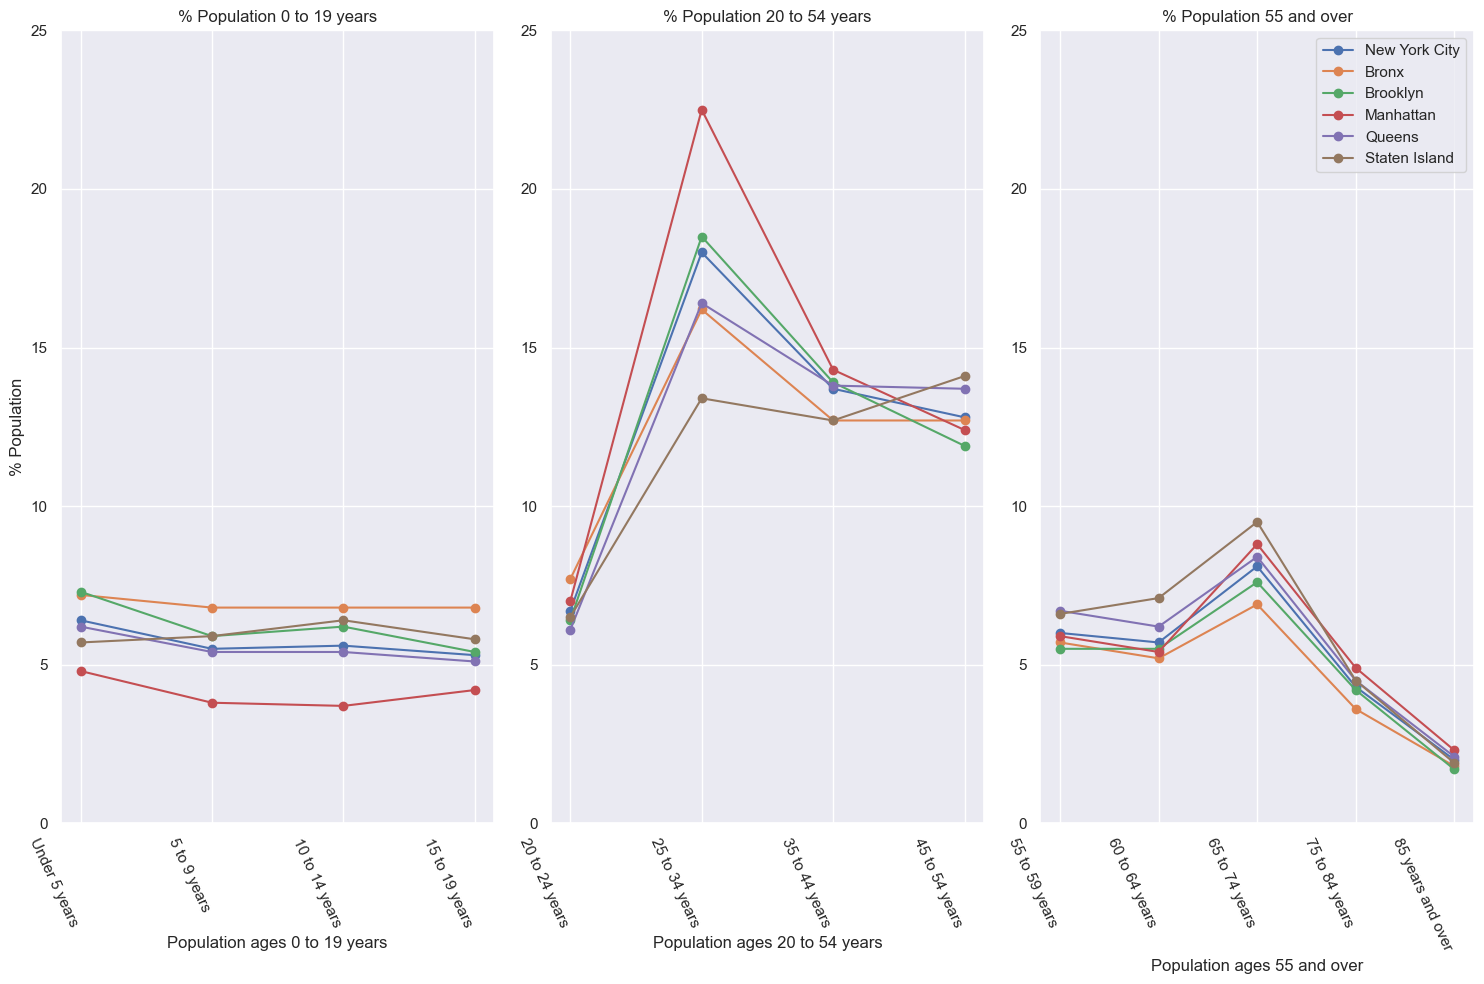

In [26]:
# Plot similar to Figure 5.16 - Your Code with appropriate comments here    
# Load health insurance data to get borough population values
def b13():
    """
    Use b13 function to call data b12 from demographics.xlsx file 
    Create 2 Index levels: the 1st Index level is Resident Ages, included 3 groups. the 2nd Index level is for age categories, included 13 categories
    Create 3 subplots - 1 row and 3 columns
    Each Subplot provides a line chart showing the percentage of the population across places which fall into each of the relative age distribution groupings
    """
    # Load data
    b12 = b12_load()

    # create new df_ind dataframe having 13 rows (index size = 13, select from the first value, not including heading)
    df_ind = b12.iloc[0:-1]
    # Focus on 'Percent' columns
    df12 = df_ind.xs('Percent', level='Type', axis=1)
    
    # Set the multi-index for the DataFrame
    index = pd.MultiIndex.from_tuples([
        ('0 to 19 years', 'Under 5 years'),
        ('0 to 19 years', '5 to 9 years'),
        ('0 to 19 years', '10 to 14 years'),
        ('0 to 19 years', '15 to 19 years'),
        ('20 to 54 years', '20 to 24 years'),
        ('20 to 54 years', '25 to 34 years'),
        ('20 to 54 years', '35 to 44 years'),
        ('20 to 54 years', '45 to 54 years'),
        ('55 and over', '55 to 59 years'),
        ('55 and over', '60 to 64 years'),
        ('55 and over', '65 to 74 years'),
        ('55 and over', '75 to 84 years'),
        ('55 and over', '85 years and over')
    ], names=['resident ages', 'categories'])
    
    df12.index = index
    
    # Plotting
    fig, axes = plt.subplots(1, 3, figsize=(15, 10))

    # Loop over each group to plot
    for i, (ax, (group_name, group_df12)) in enumerate(zip(axes, df12.groupby(level=0))):
        group_df12.xs(group_name, level=0).plot(kind="line", ax=ax, marker='o')
        ax.set_title(f'% Population {group_name}')
        ax.set_xlabel(f"Population ages {group_name}")
        ax.set_ylim(0, 25)                                               
    
        # Set the x-tick labels
        labels = group_df12.index.get_level_values(1)
        ax.set_xticks(range(len(labels)))
        ax.set_xticklabels(labels, rotation=-65, ha='right')
        
        # Set the y-axis label only for the first plot
        if i==0:
            ax.set_ylabel("% Population")
    
        # Control legend visibility: only show legend in the last plot
        if i < len(axes) - 1:
            ax.get_legend().remove()
        else:
            ax.legend(loc='upper right')                                               
                                                       
    # Adjust layout
    plt.tight_layout()
    plt.show()
    
# Call the function to create the plots
b13()


### B2.1 Loading commuter data (5 marks)
Data on how the residents of the five boroughs (Workers 16 years and over) commute to work was extracted from the ACS economic dataset and loaded into the excel spreadsheet:  `commuting.xlsx` 

For the `b21_load()` function below: 
- Load the Commuting excel spreadsheet `commuting.xlsx` into a DataFrame.
- Your DataFrame's row and column indexes should match those in the excel spreadsheet.
- The code cell provided below function b3_load() - shown below - should return the value `4072761`.
  - Which is the the number of `Workers 16 years and over` in New York City.

`b21= b21_load()
 b21['New York City','Estimate'][0]`

In [27]:
def b21_load():
    """
    b21_load function is created to load the data file
    file name is an excel file : commuting.xlsx
    """
    # Load the health-insurance excel file into DataFrame b11, the header=[0, 1] for multi-level columns
    b21 = pd.read_excel('commuting.xlsx', index_col=0, header=[0, 1]) 
    
    def str_to_int(value):
        """
        str_to_float function used to convert values with string to float
        """
        # If the value is a string, try to convert it to an integer
        if isinstance(value, str):
            try:
                return int(value.replace(',', '')) #.replace( '%','')) # Remove commas and try to convert to integer
            except ValueError:
                return value #If conversion fails, return the original string value
        else:
             #If the value is not a string, return it unchanged
            return value

    # Apply coverting function to the entire DataFrame
    b21 = b21.applymap(str_to_int)
    
    return b21
    
    pass

In [28]:
b21 = b21_load() # Call b21_load() function to read the data
b21['New York City','Estimate'][0] #The number of Workers 16 years and over in New York City

4072761

In [15]:
#b21

### B2.2 Commuting to work (16 marks)
The ACS economic dataset provides information on how the residents of the five boroughs (Workers 16 years and over) commute to work.

Create a line chart which shows the percentage of the population for each borough and their means of commuting. Your plot should also include NYC as a sixth 'borough' for comparison.  You may find Figure 5.17 from the Truthful Art helpful.  This plot was discussed in the TA-5 notebook.

Your `b22()` function should:
- call the `b21_load()` function to retrieve the Commuter Data Frame  
- extract commuter data for each type of commuting for each borough 
- create a plot similar to Figure b22 below:
  - different coloured lines for each commuting category 
  - appropriate labels and legend
  
  
  <img src="b22.png" width=663 height=597 align=left />

In [29]:
def b22():
    """
    Process and plot commuting data for NYC boroughs.
    """

    # Create a new DataFrame data_b21 which displays only 4 Commuters
    data_b21 = b21.iloc[1:-2]
    
    # Focus on 'Percent' columns
    data_b21 = data_b21.xs('Percent', level='Type', axis=1)
    
    def str_to_float(value):
        """
        Convert percentage strings to floats.
        """
        if isinstance(value, str):
            try:
                return float(value.replace('%', ''))  # Remove % and convert to float
            except ValueError:
                return value  # If conversion fails, return the original string value
        else:
            return value
    
    # Apply the str_to_float function to all elements of the DataFrame
    data_b21 = data_b21.applymap(str_to_float)
    
    # Rename column 'New York City' to 'NYC'
    data_b21.rename(columns={'New York City': 'NYC'}, inplace=True)
    
    # Transpose the data, indexes becoming columns
    data_b21 = data_b21.T
    
    # Plotting the data
    plt.figure(figsize=(10, 6))
    
    # Looping each column of data_b21 and set index values as x-axis, column values as y-axis
    for column in data_b21.columns:
        plt.plot(data_b21.index, data_b21[column], marker='o', label=column)
    
    #Seting labels and title, and legend names
    plt.xlabel('Boroughs of NYC')
    plt.ylabel('% Working population (workers >= 16 years)')
    plt.title('Types of commuting within NYC Boroughs')
    plt.legend(['Drove alone', 'Carpool', 'Public transport', 'Walked'], ncol=1)
    plt.grid(True)
    plt.show()
    
    #return data_b21
    pass


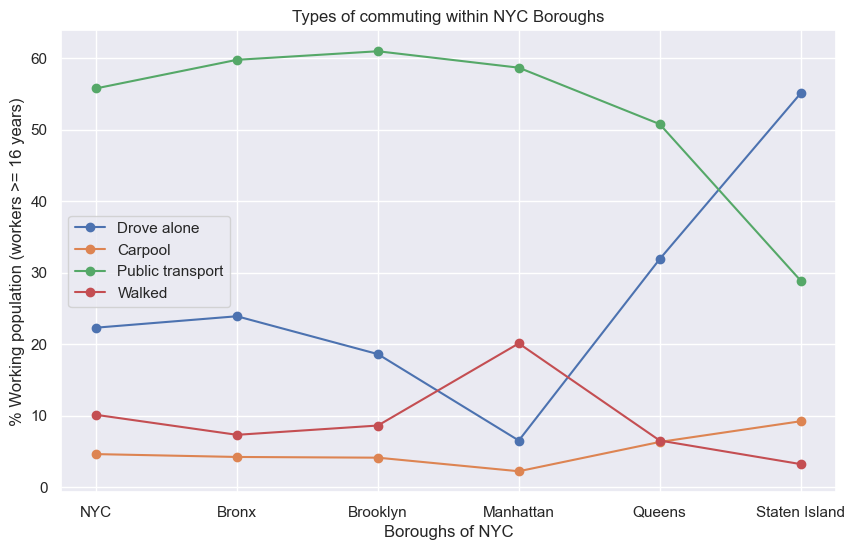

In [30]:
b22()

## B3: Birthdays [23 total marks]
For this problem we will be analysing and visualising two big countries' birth data as an homage to Matt Stiles's ["How Common is Your Birthday"](http://thedailyviz.com/2016/09/17/how-common-is-your-birthday-dailyviz/) article.  Our chart will use the  birth data provided in A2 data folder: `BigCountryX_births_2000-2012.csv`, `BigCountryY_births_2005-2014.csv`.


Both files have the following structure:

| year |	month |	date_of_month |	day_of_week	 | births |
|:---|:---|:---|:---|:---|
| 2000 |	1 |	1 |	6 |	8096 |
 |2000 |	1 |	2 |	7 |	7772 |
 |2000 |	1 |	3 |	1 |	10142 |
 |2000 |	1 |	4 |	2 |	11248 |


## B31 Load data [7 marks]
Complete the `b31()` function below which should provide the following functionality:
- Load data from the two files into one Data Frame and clean as required.
- Return a Data Frame with multiple indexes for `month` and `date_of_month` and a `births` column which has the average daily births from 2000-2014. You are required to average the daily births of the two big countries (Country X, Country Y). See `b31().tail()` output below. *Hint: Review the PyDSHB notebook: *03.05 Hierarchical Indexing*.

<img src="a2fig/b31.JPG" width=442 height=398 align=left />

In [20]:
def b31():
    """
    b31 function is used to read 2 csv files of the birth data of country X and Y
    combining 2 data into 1, then grouping 'month' and 'date_of_month' columns by the average of births to observe the birth averages of each date of months
    setting multiple index for the average births data, the 1st index level named 'month', the 2nd index level named 'date_of_month'
    """
    X = pd.read_csv('BigCountryX_births_2000-2012.csv') # read data of country X
    Y = pd.read_csv('BigCountryY_births_2005-2014.csv') # read data of country Y
    
    # Combine 2 data X and Y into 1 dataframe
    X_and_Y = pd.concat([X, Y], ignore_index=True) 
    
    # Group X_and_Y data by month and date_of_month, and calculate the birth averages
    avg_births_XY = X_and_Y.groupby(['month', 'date_of_month'])['births'].mean().reset_index() 
    
    # Set the multiple index by month and date_of_month
    avg_births_XY.set_index(['month', 'date_of_month'], inplace=True) 
    
    return avg_births_XY
    
    pass

In [31]:
# call b31 function and execute the last 5 rows

b31().tail()

births
month date_of_month              
12    27             12193.130435
      28             11680.086957
      29             11680.173913
      30             11543.260870
      31             10356.434783

### B3.2 Plot data [16 marks]
Create a heatmap style plot to show the average daily births per month/day, as shown in the picture below.

Additional criteria and information:
 - Use `b31()` function to load data 
 - You are not allowed to directly apply the bulit-in function `seaborn.heatmap()` 
 - The birth data were provided with different years for Country X and Country. This should not affect your calculation of average daily births. For any month/day, for example, 1st December, you just need to average on all the #birth on 1st December, across all the years for both Country X and Country Y. 
 - Figure size: 16 by 6
 - Add appropriate labels. 
   - X-axis labels should be on the top of the plot.
 - For the color bar select the appropriate discrete values and color limits. Indicate out-of-bounds values with a triangular arrow.
    - Do not need to duplicate article's color map or colorbar placement. 
 - You may find the following recources useful:
    - Matt Stiles's article: ["How Common is Your Birthday"](http://thedailyviz.com/2016/09/17/how-common-is-your-birthday-dailyviz/).
    - [Creating annotated heatmaps](https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py) 
    - PyDSHB: 04.07 Customizing Colorbars (from course material)


<img src="a2fig/b32.png" width=1476 height=686 align=left/> <br>

In [32]:
def b32():
    """
    load Average births data of 2 countries from b31() function
    Create a pivot table to make a heatmap of average births values between date_of_month and month
    Use imshow to create heatmap
    X-axis label is desplayed in the top of the heatmap
    color bar is range from 9500 to 12400 
    """
    # load and assign avg_births_XY variable is b31()
    avg_births_XY = b31() 
    
    #Create a pivot table for heatmap and transpose data so that index will be month and columns are date of month
    heatmap_data = avg_births_XY.unstack(level=0)['births'].T 
    
    #Plotting the heatmap data
    
    fig, ax = plt.subplots(figsize=(16,6))
    
    # apply imshow to create the heatmap
    cmap = plt.get_cmap('Blues')
    norm = mcolors.BoundaryNorm(np.linspace(9500,12400,10), cmap.N)
    im = ax.imshow(heatmap_data.values, cmap=cmap, norm=norm, aspect='auto')
    
    #Create color bar
    cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.1, aspect=50, extend='both', label='Average Births')
    cbar.set_ticks([9500, 11000, 12400])
    cbar.set_ticklabels(['<9.5k', '11k', '>12.4k'])
    
    #Set color limits
    im.set_clim(9500, 12400)
    
    # Set ticks for x and y
    ax.set_xticks(np.arange(len(heatmap_data.columns)))
    ax.set_xticklabels(heatmap_data.columns)
    ax.set_yticks(np.arange(len(heatmap_data.index)))
    ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    # Adjust x axis tick labels to the top
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')

    # Create Gridlines with white color
    ax.set_xticks(np.arange(0.5, 31.5, 1), minor=True)
    ax.set_yticks(np.arange(0.5, 12.5, 1), minor=True)
    ax.grid(which='minor', color='white', linestyle='-', linewidth=2)
    
    fig.tight_layout()
    plt.show()
    
    pass


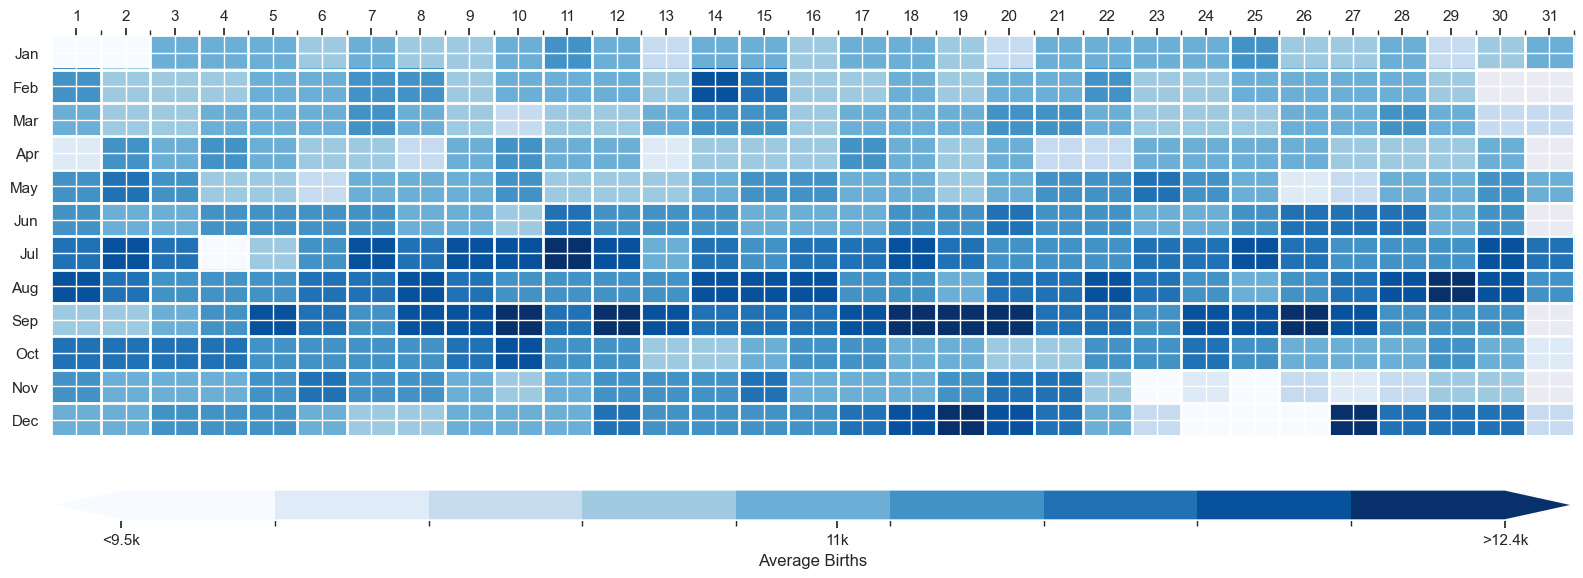

In [33]:
b32()